In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [40]:
dfsData = []
dfsDataLite = []
# with uproot.open('/data/mdicosta/DplusFlow/Templates/469721/AO2DHF_LHC25e4_All.root') as f:
with uproot.open('/home/mdicosta/LocalTestsO2/corrbkgs/Dplus/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddplite' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2318754584894576;1', 'DF_2318754584894576/O2hfcanddpfullp;1', 'DF_2318754584894576/O2hfcanddplite;1', 'DF_2318754584894608;1', 'DF_2318754584894608/O2hfcanddpfullp;1', 'DF_2318754584894608/O2hfcanddplite;1', 'DF_2318754584894640;1', 'DF_2318754584894640/O2hfcanddpfullp;1', 'DF_2318754584894640/O2hfcanddplite;1', 'DF_2318754584894672;1', 'DF_2318754584894672/O2hfcanddpfullp;1', 'DF_2318754584894672/O2hfcanddplite;1', 'DF_2318754584894704;1', 'DF_2318754584894704/O2hfcanddpfullp;1', 'DF_2318754584894704/O2hfcanddplite;1', 'parentFiles;1']
DF_2318754584894576/O2hfcanddplite;1
DF_2318754584894608/O2hfcanddplite;1
DF_2318754584894640/O2hfcanddplite;1
DF_2318754584894672/O2hfcanddplite;1
DF_2318754584894704/O2hfcanddplite;1
len(full_df): 6


<Axes: >

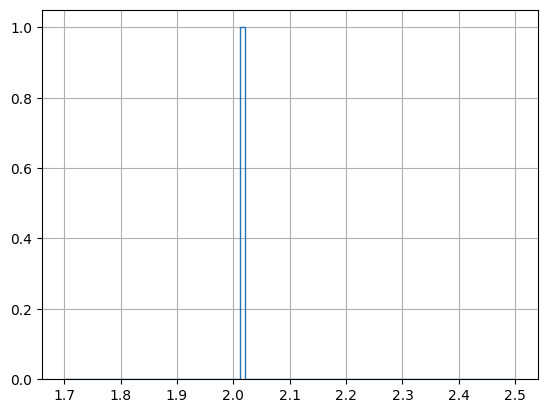

In [41]:
full_df.query("abs(fFlagMcMatchRec) == 10")['fM'].hist(bins=100, range=(1.7, 2.5), histtype='step', label='fFlagMcMatchRec == 9')

Unique |fFlagMcMatchRec| values: [1, 7, 10]
|fFlagMcMatchRec| == 1: 4
|fFlagMcMatchRec| == 7: 1
|fFlagMcMatchRec| == 10: 1


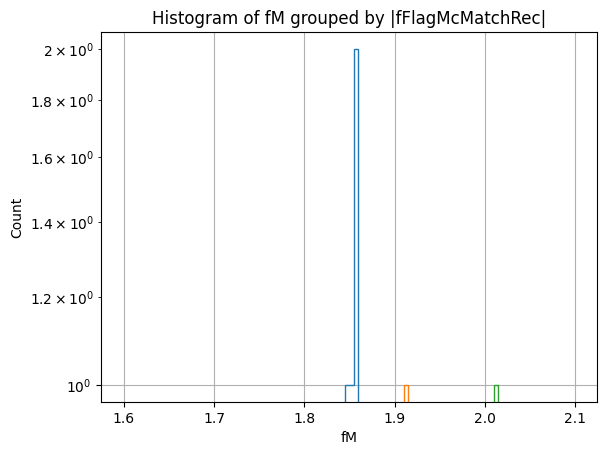

In [42]:
# Get unique absolute values of the flags
unique_abs_flags = sorted(full_df['fFlagMcMatchRec'].abs().unique())
print(f"Unique |fFlagMcMatchRec| values: {unique_abs_flags}")

for abs_flag in unique_abs_flags:
    # Filter all rows where the absolute value of the flag matches
    df_filtered = full_df[full_df['fFlagMcMatchRec'].abs() == abs_flag]
    print(f"|fFlagMcMatchRec| == {abs_flag}: {len(df_filtered)}")

    # Plot histogram
    df_filtered['fM'].hist(
        bins=100,
        range=(1.6, 2.1),
        histtype='step',
        label=f'|fFlagMcMatchRec| == {abs_flag}',
        log=True,
    )

# plt.legend()
plt.xlabel('fM')
# plt.ylim(10, 2700)
plt.ylabel('Count')
plt.title('Histogram of fM grouped by |fFlagMcMatchRec|')
plt.show()

In [43]:
print(full_df.columns)

Index(['fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised',
       'fDecayLengthXYNormalised', 'fPtProng0', 'fPtProng1', 'fPtProng2',
       'fImpactParameter0', 'fImpactParameter1', 'fImpactParameter2',
       'fImpactParameterZ0', 'fImpactParameterZ1', 'fImpactParameterZ2',
       'fNSigTpcPi0', 'fNSigTpcKa0', 'fNSigTofPi0', 'fNSigTofKa0',
       'fNSigTpcTofPi0', 'fNSigTpcTofKa0', 'fNSigTpcPi1', 'fNSigTpcKa1',
       'fNSigTofPi1', 'fNSigTofKa1', 'fNSigTpcTofPi1', 'fNSigTpcTofKa1',
       'fNSigTpcPi2', 'fNSigTpcKa2', 'fNSigTofPi2', 'fNSigTofKa2',
       'fNSigTpcTofPi2', 'fNSigTpcTofKa2', 'fCandidateSelFlag', 'fM', 'fPt',
       'fCpa', 'fCpaXY', 'fMaxNormalisedDeltaIP', 'fEta', 'fPhi', 'fY',
       'fCentrality', 'fNumContrib', 'fFlagMcMatchRec', 'fOriginMcRec',
       'fFlagMcDecayChanRec'],
      dtype='object')


In [44]:
unique_values = full_df['fFlagMcMatchRec'].unique()
print("Unique values in fFlagMcMatchRec:", unique_values)

full_df = full_df[full_df['fFlagMcMatchRec'] != 0]
print(f"Unique values in fFlagMcMatchRec after filtering: {sorted(full_df['fFlagMcMatchRec'].unique())}")
print(f"len(full_df) after filtering: {len(full_df)}")

Unique values in fFlagMcMatchRec: [  1  -1 -10  -7]
Unique values in fFlagMcMatchRec after filtering: [-10, -7, -1, 1]
len(full_df) after filtering: 6


In [45]:
# Check if all resonant flags have been activated
particles = {
    'Dplus': [1, 4],
    'Ds': [5, 9],
    'Dstar': [10, 16],
    'Lc': [17, 20],
    'Xic': [21, 23],
}

for particle, flag_range in particles.items():
    filtered_df = full_df[
        (abs(full_df['fFlagMcMatchRec']) >= flag_range[0]) &
        (abs(full_df['fFlagMcMatchRec']) <= flag_range[1])
    ].copy()  # Ensure it's a separate copy

    unique_fin_states = filtered_df['fFlagMcMatchRec'].unique()
    unique_fin_states_sorted = sorted(unique_fin_states)  # Sort in increasing order

    unique_dec_chns = filtered_df['fFlagMcDecayChanRec'].unique()
    unique_dec_chns_sorted = sorted(unique_dec_chns)  # Sort in increasing order

    print(f"[{particle}]:\n\tNCands: {len(filtered_df)}, \n\tUnique values in fFlagMcMatchRec after filtering (sorted): {unique_fin_states_sorted} \n\tUnique values in fFlagMcDecayChanGen after filtering (sorted): {unique_dec_chns_sorted}")

[Dplus]:
	NCands: 4, 
	Unique values in fFlagMcMatchRec after filtering (sorted): [-1, 1] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0]
[Ds]:
	NCands: 1, 
	Unique values in fFlagMcMatchRec after filtering (sorted): [-7] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [11]
[Dstar]:
	NCands: 1, 
	Unique values in fFlagMcMatchRec after filtering (sorted): [-10] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): [0]
[Lc]:
	NCands: 0, 
	Unique values in fFlagMcMatchRec after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []
[Xic]:
	NCands: 0, 
	Unique values in fFlagMcMatchRec after filtering (sorted): [] 
	Unique values in fFlagMcDecayChanGen after filtering (sorted): []


In [46]:
unique_flags_sorted = sorted(full_df['fFlagMcDecayChanRec'].unique())  # Sort in increasing order
print(f"Unique values in fFlagMcDecayChanRec after filtering (sorted): {unique_flags_sorted}")

Unique values in fFlagMcDecayChanRec after filtering (sorted): [0, 11]


In [47]:
unique_values = full_df['fFlagMcDecayChanRec'].unique()
print("Unique values in fFlagMcDecayChanRec:", unique_values)

Unique values in fFlagMcDecayChanRec: [ 0 11]


In [48]:
print(full_df['fFlagMcMatchRec'])

0     1
1    -1
2   -10
3    -7
4     1
5    -1
Name: fFlagMcMatchRec, dtype: int8


<Axes: >

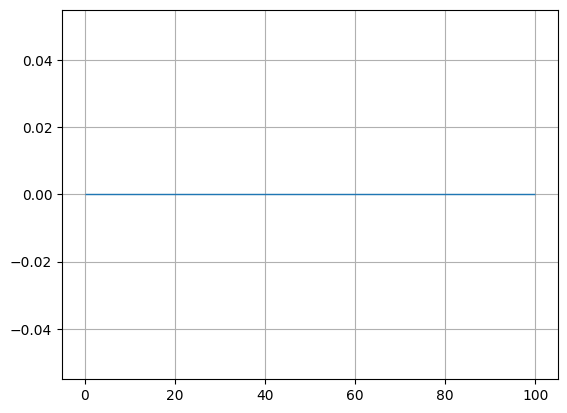

In [49]:
filtered_df['fCandidateSelFlag'].hist(
    bins=100,
    range=(0, 100),
    histtype='step',
    label='fSelectionFlag',
    # log=True,
)

In [50]:
print(f"filtered_df['fFlagMcMatchRec'].unique(): {filtered_df['fFlagMcMatchRec'].unique()}")
for flag in filtered_df['fFlagMcMatchRec'].unique():
    print(f"fFlagMcMatchRec == {flag}: {len(full_df.query(f'abs(fFlagMcMatchRec) == {flag}'))}")
    full_df.query(f'abs(fFlagMcMatchRec) == {flag}')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label=f'fFlagMcMatchRec == {flag}')
    
# full_df.query('abs(fFlagMcMatchRec) == 31')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 31')
# full_df.query('abs(fFlagMcMatchRec) == 99')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 99')
# full_df.query('abs(fFlagMcMatchRec) == 74')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 74')
# full_df.query('abs(fFlagMcMatchRec) == 102')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 102')

filtered_df['fFlagMcMatchRec'].unique(): []


In [35]:
unique_values = full_df['fCentrality'].unique()
print("Unique values in fCentrality:", unique_values)

Unique values in fCentrality: [ 55.  25.  24.  32.  71.  74.  30.  39.  56.  29.  49.  92.  46.  36.
  66.  28.  64.  23.  65.  44.  42.  90.  43.  70.  19.  61.  82.  26.
  58.  31.  22.  80.  47.  53.  79.  69.   7.  34.  78.  60.   3.  15.
  48.  17. 111.  41.  77.  54.  88.  21.  13.  18.  59. 106. 123.  27.
  38.  35.  85.  33. 151.  57.  37.  67.  14.  50.  52.  51.  73.  45.
  10.  63.  20. 112.  75.  98.   6.  83.  87. 108. 117.  97.  12.  62.
 103.  81.  11. 104.  40. 100.  72.   2.  86.  95.   8.  68.  84.  89.
  96.  16. 114. 134.  99. 101. 135. 162.  76. 121. 115. 110. 107.  91.
 102. 105.  93.  94. 132.   4.   9. 126. 109. 125. 159. 141. 136. 118.
 131. 130. 148. 122. 113. 137. 144. 140. 128. 119. 129. 116.   5. 124.
 150. 138. 127. 146. 160. 120. 149. 133. 139. 188. 143. 142. 161. 176.
 179. 147. 155. 194. 145. 172. 152. 158. 153. 156. 182. 165. 164. 180.
 174. 169. 163. 154. 168. 166. 157. 173. 192. 177. 200. 167. 184. 170.
 205. 204. 171. 207. 206. 183. 187.]


Plotting fChi2PCA
Plotting fDecayLength
Plotting fDecayLengthXY
Plotting fDecayLengthNormalised
Plotting fDecayLengthXYNormalised
Plotting fPtProng0
Plotting fPtProng1
Plotting fPtProng2


/tmp/ipykernel_3532350/3635721094.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fImpactParameter0
Plotting fImpactParameter1
Plotting fImpactParameter2
Plotting fImpactParameterZ0
Plotting fImpactParameterZ1
Plotting fImpactParameterZ2
Plotting fNSigTpcPi0
Plotting fNSigTpcKa0
Plotting fNSigTofPi0
Plotting fNSigTofKa0
Plotting fNSigTpcTofPi0
Plotting fNSigTpcTofKa0
Plotting fNSigTpcPi1
Plotting fNSigTpcKa1
Plotting fNSigTofPi1
Plotting fNSigTofKa1
Plotting fNSigTpcTofPi1
Plotting fNSigTpcTofKa1
Plotting fNSigTpcPi2
Plotting fNSigTpcKa2
Plotting fNSigTofPi2
Plotting fNSigTofKa2
Plotting fNSigTpcTofPi2
Plotting fNSigTpcTofKa2
Plotting fCandidateSelFlag
Plotting fM
Plotting fPt
Plotting fCpa
Plotting fCpaXY
Plotting fMaxNormalisedDeltaIP
Plotting fEta
Plotting fPhi
Plotting fY
Plotting fCentrality
Plotting fNumContrib
Plotting fFlagMcMatchRec
Plotting fOriginMcRec
Plotting fFlagMcDecayChanRec


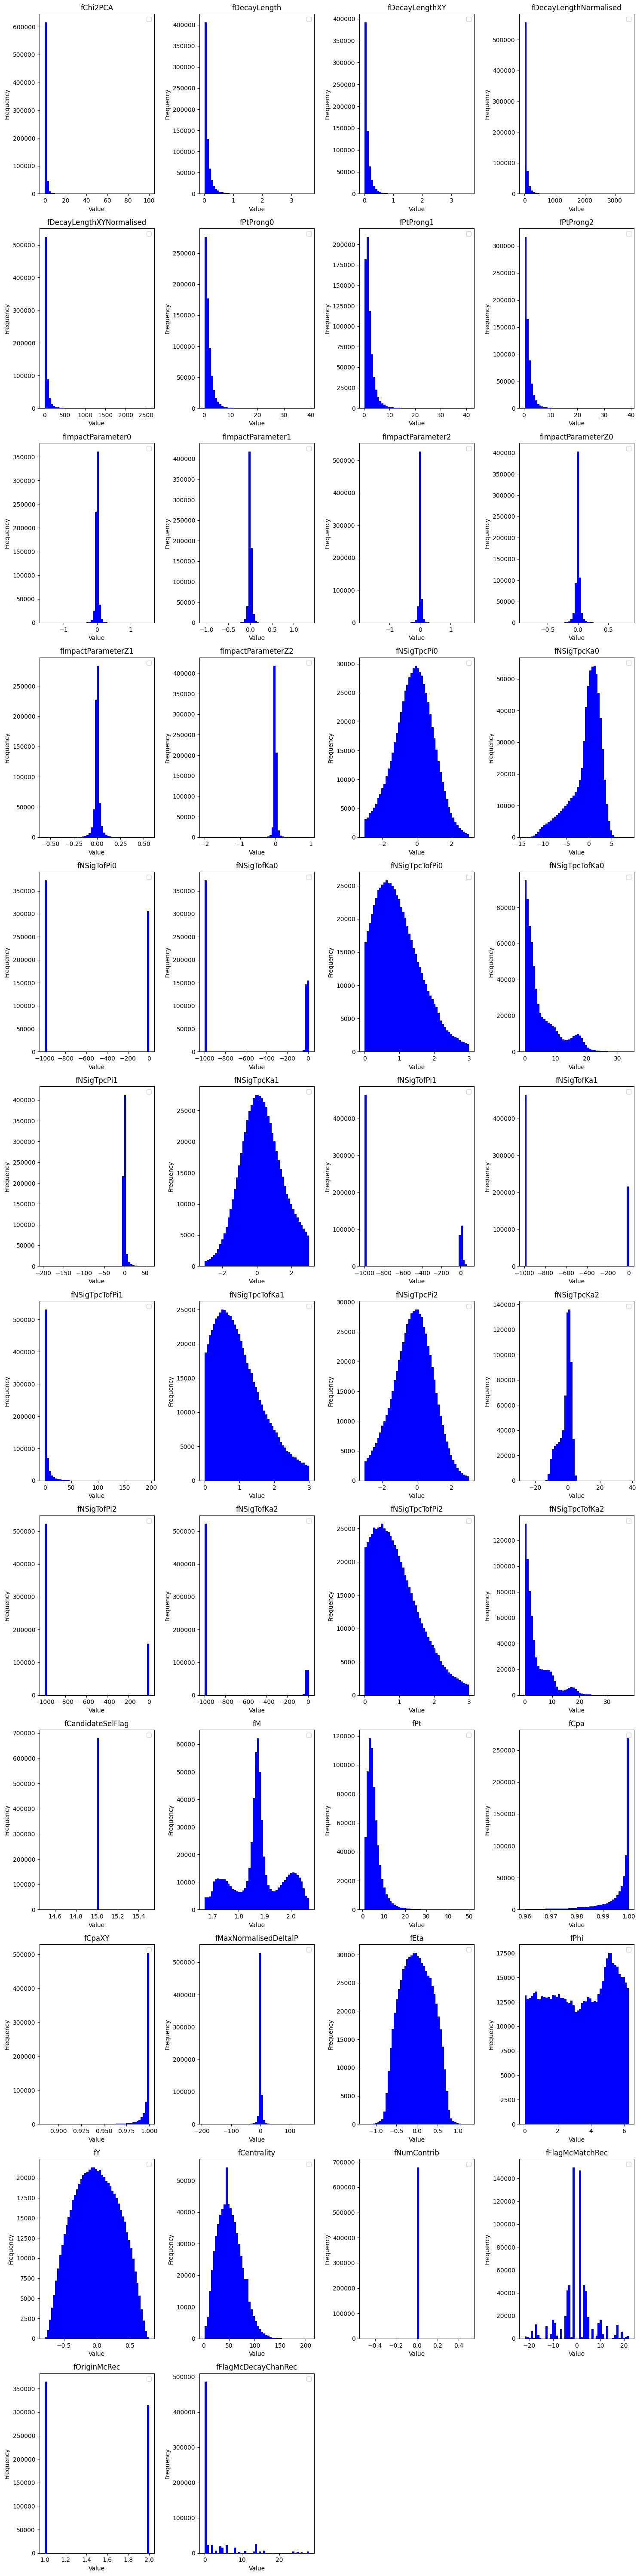

In [36]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: >

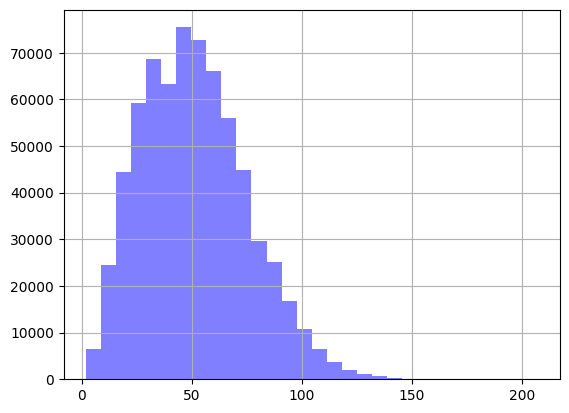

In [37]:
full_df['fCentrality'].hist(bins=30, color='blue', alpha=0.5, label='Matched')

<Axes: >

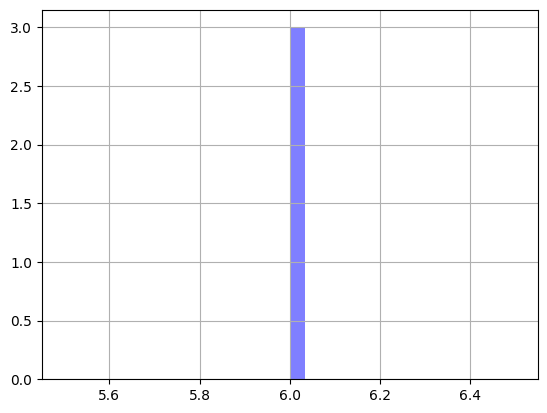

In [38]:
full_df.query('abs(fFlagMcDecayChanRec) == 7')['fFlagMcMatchRec'].hist(bins=30, color='blue', alpha=0.5, label='Matched')